# Image란?

In [5]:
1280 * 1920 *2

4915200

In [4]:
2**20

1048576

## Image는 width X height X channel 의 pixels로 이루어진 matrix

- width: 너비로 이미지의 가로 길이를 의미한다.
- height: 높이로 이미지의 세로 길이를 의미한다.
- pixel: image가 가지고 있는 값으로 width X height 개수만큼 존재한다. image를 표현하는 bit방식에 따라 값의 범위가 달라진다.
- 일반적인 Image는 unsigned integer 8bit로 표현
    - 0 ~ 255 로 표현
- bit수가 높아질 수록 표현할 수 있는 색의 범위가 증가한다.
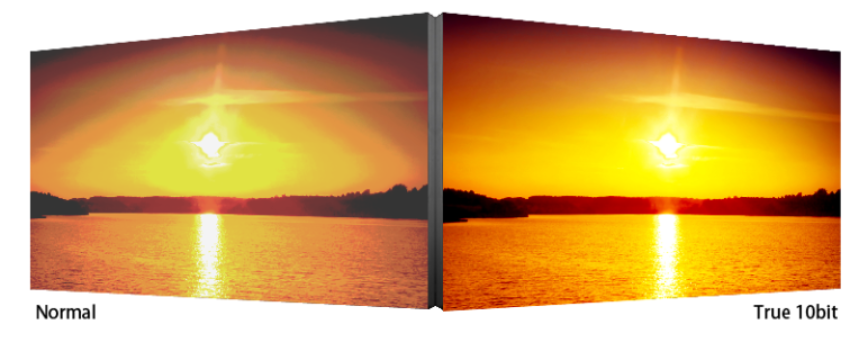

# Open CV 개요
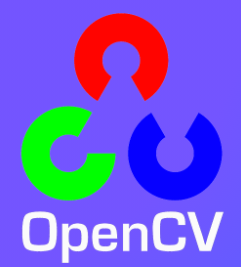

- https://opencv.org/
- Open Source Computer Vision Library로 실시간 computer vision을 목적으로 개발됨.
- Intel에서 개발하다가 open source화 됨.
- Cross Platform으로 Windows, Mac, Linux, OS에 상관없이 동작 가능
- C/C++로 개발 되었으나 Python, JAVA, MATLAB의 개발 환경도 지원한다.
- 실시간에 초점을 맞추고 나온 library이기 때문에 mobile device나 로봇 등에 recognition module로 붙여 영상처리에 활용된다.

# OpenCV 설치

- `!pip install opencv-contrib-python`

# 이미지 읽기
- **`imread(filename [, flag]) : ndarray`**
    - 이미지를 읽는다.
        
    - filename: 읽어들일 이미지 파일경로
    - flag: 읽기 모드
        - cv2.IMREAD_XXXXX 상수를 이용한다.
        - IMREAD_COLOR가 기본(BGR 모드)
            - matplotlib에서 출력시 rgb 모드로 변환해야 한다.
    - 읽은 이미지를 ndarray(numpy 배열) 로 반환한다.

In [1]:
import cv2

img_path = r"images/penguin.jpg"
img = cv2.imread(img_path) # BGR 모드(color) -> 3차원 (height, width, channel:3)

In [3]:
print(type(img))
print(img.shape)
# (222, 296, 3)
# (height, width, channel)
print(img.dtype)
print(img.max(), img.min())
img
# 222*296*3

<class 'numpy.ndarray'>
(222, 296, 3)
uint8
255 0


array([[[210, 174, 120],
        [208, 177, 116],
        [207, 176, 113],
        ...,
        [203, 160,  87],
        [202, 162,  87],
        [203, 162,  89]],

       [[214, 177, 119],
        [212, 179, 116],
        [211, 177, 117],
        ...,
        [203, 164,  86],
        [202, 162,  87],
        [204, 162,  85]],

       [[214, 176, 118],
        [213, 176, 116],
        [212, 178, 119],
        ...,
        [202, 162,  90],
        [204, 163,  90],
        [203, 163,  91]],

       ...,

       [[120, 118, 108],
        [113, 120, 107],
        [116, 126, 113],
        ...,
        [105, 105,  87],
        [128, 126, 116],
        [137, 142, 121]],

       [[142, 137, 136],
        [107, 107,  93],
        [119, 134, 113],
        ...,
        [114, 119, 104],
        [118, 113, 104],
        [114, 120, 101]],

       [[117, 135, 118],
        [130, 129, 119],
        [116, 113,  92],
        ...,
        [125, 123, 112],
        [124, 131, 116],
        [122, 125, 103]]

In [14]:
# 출력
cv2.imshow("frame", img)
cv2.waitKey()
cv2.destroyAllWindows()

In [5]:
img2 = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
print(img2.shape)
# (height, width) => channel 축이 없음 ==> Gray scale (회색조-흑백)

(222, 296)


In [8]:
cv2.imshow("frame", img2)
cv2.waitKey()
cv2.destroyAllWindows()

### matplotlib 으로 출력
- jupyter notebook 내에 출력이 가능

> cv2.waitKey(밀리초): int
>    - 지정한 밀리초(1/1000 초)동안 keyboard 입력을 기다린다. 
>    - 입력된 key 코드를 반환하며 지정된 시간동안 keyboard입력을 못받은 경우 -1을 반환한다.
>    - argument로 0을 입력하면 keyboard 입력을 받을 때 까지 무한 대기한다.
>    - https://www.ascii-code.com/

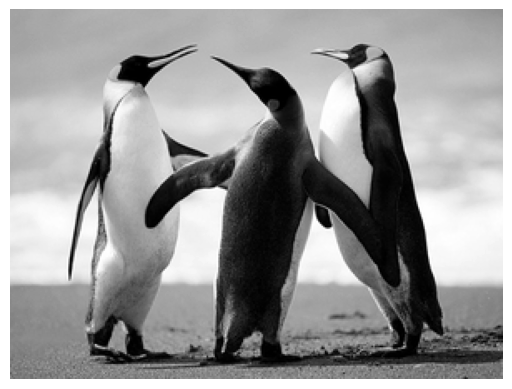

In [10]:
import matplotlib.pyplot as plt

# grayscale
# plt.figure(figsize=(10,10))
plt.imshow(img2, cmap='gray')
plt.axis('off')  # 경계선(spine)을 제거
plt.show()

In [19]:
img[0,0]

array([210, 174, 120], dtype=uint8)

In [20]:
img[:, :, ::-1][0, 0]

array([120, 174, 210], dtype=uint8)

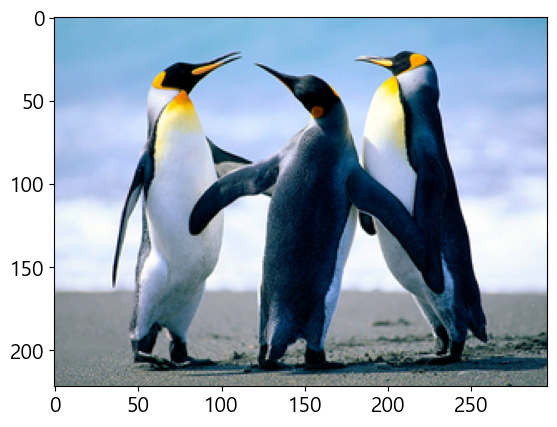

In [21]:
# matplot lib -> RGB 
plt.imshow(img[:, :, ::-1])  # 3차원 배열 -> BGR -> RGB
                  # -> 컬러이미지로 출력 (height, width, channel)
plt.show()

## 색공간 변환
- **`cv2.cvtColor(src, code)`**
    - image 의 color space를 변환한다. 
    - src: 변환시킬 이미지 (ndarray)
    - code
        - 변환시킬 색공간 타입 지정
        - cv2.COLOR_XXX2YYY 형태의 상수 지정(XXX를YYY로 변환)
            - cv2.COLOR_BGR2GRAY / cv2.COLOR_GRAY2BGR (BGR <-> GRAY)
            - cv2.COLOR_BGR2RGB  / cv2.COLOR_RGB2BGR  (BGR <-> RGB)
            - cv2.COLOR_BGR2HSV  / cv2.COLOR_HSV2BGR  (BGR <-> HSV)

> ### HSV 색공간
> - Hue: 색상, 색의 종류
> - Saturation: 채도. 색의 선명도
> - Value : 명도. 밝기
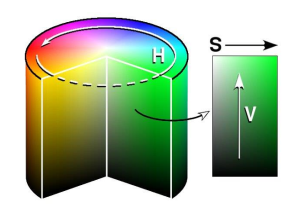
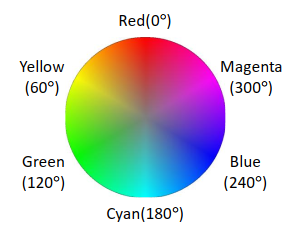

> - color를 gray로 변환하면 색정보를 손실하는 단점이 있지만 저장용량을 줄이고 처리속도를 향상시킬 수 있다.
> - gray 로 변환 : rgb를 더하는데 opencv는 다음과 같이 가중치를 줘서 더한다.
> $$ y = 0.299R + 0.587G + 0.114B$$

In [11]:
# img # BGR -> RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_hsv2 = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

In [12]:
print(img[0,0])
print(img_rgb[0,0])
print(img_gray[0,0])
print(img_hsv[0,0])
print(img_hsv2[0,0])

[210 174 120]
[120 174 210]
162
[102 109 210]
[102 109 210]


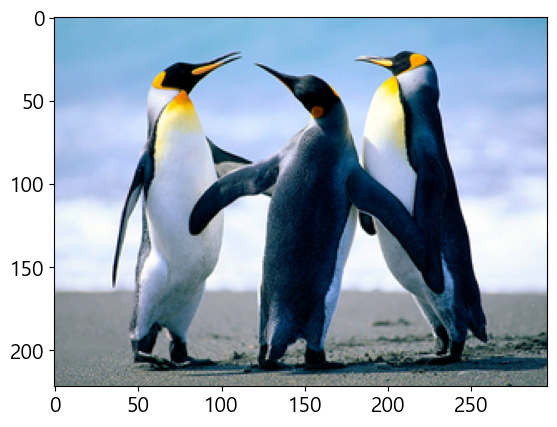

In [13]:
plt.imshow(img_rgb);

## cv2에서 이미지 출력
- **`cv2.imshow(winname, mat)`**
    - 창을 띄워 이미지를 출력한다.
    - winname: 창 이름
        - 창이름이 같으면 같은 창에 띄운다.
    - mat: 출력할 이미지(ndarray)
        - dtype이 uint8이어야 정상 출력된다. (float일 경우 255를 곱해서 출력한다.)
- **`cv2.imwrite(filename, img): bool`**
    - 이미지 파일로 저장
    - filename: 저장할 파일경로
    - img: 저장할 이미지(ndarray)

In [33]:
import cv2 

img1 = cv2.imread(r"images/penguin.jpg")
img2 = cv2.imread(r"images/Lenna.png")
img3 = cv2.imread(r"images/window.jpg")

In [35]:
# 출력 - 한장씩 한장씩.
cv2.imshow("frame", img1)
cv2.waitKey()

cv2.imshow("frame", img2)
cv2.waitKey()

cv2.imshow("frame", img3)
cv2.waitKey()

cv2.destroyAllWindows()

In [28]:
cv2.imshow("frame", img3)
v = cv2.waitKey(2000) # 2초
print(v)
cv2.destroyAllWindows()

65


In [22]:
# 표준함수: 문자를 유니코드값으로 변환. 
ord('a'), ord('가'), ord('!')

(97, 44032, 33)

In [26]:
# 특정 키를 입력했을 때 종료
cv2.imshow("frame", img3)
while True:
    #if cv2.waitKey() == 27:  # ESC 
    if cv2.waitKey() == ord('q'):
        break
cv2.destroyAllWindows()

In [29]:
## 디렉토리 생성
import os
os.makedirs("output", exist_ok=True)

cv2.imwrite("output/img1.jpg", img1)
cv2.imwrite("output/img2.jpg", img2)
cv2.imwrite("output/img3.jpg", img3)

True

# 동영상 처리

## 동영상 읽기
- VideoCapture 클래스사용
    - 객체 생성
        - VideoCapture('동영상파일 경로'): 동영상파일
        - VideoCapture(웹캠 ID): 웹캠
- VideoCapture의 주요 메소드
    - isOpened(): bool
        - 입력 대상과 연결되었는지 여부반환
    - read(): (bool, img)
        - Frame 이미지로 읽기
        - 반환값
            - bool: 읽었는지 여부
            - img: 읽은 이미지(ndarray)
    - release()
        - 카메라/동영상과 연결 종료

### 웹캠으로 부터 실시간 입력 받기

> - **주의**
> - 맥에서 웹캠연결
>     - mac 시스템 환경 설정에 보안 및 개인 정보 보호에서 카메라 관련 권한 설정필요. 
>     - [출처](https://hoony-gunputer.tistory.com/entry/opencv-python-비디오-읽고-쓰기)
> 

In [40]:
import cv2

# VideoCapture 객체 생성 -> 대상과 연결. 
cap = cv2.VideoCapture(0)  # int: 웹캠(0부터 1씩 증가), str: 동영상파일.
print("연결성공여부:", cap.isOpened())
# 반복문에서 한프레임씩 읽(어서 처리)는다.
while cap.isOpened():
    # 한 프레임 읽기
    suss, img = cap.read() # (성공여부:bool, frame: ndarray)
    if not suss:
        print("읽지 못했습니다.")
        break
    ########################
    #  처리코드
    ########################  
    # 좌우반전. cv2.flip(대상이미지, flag) - flag: 양수-수평, 0-수직, 음수-수평/수직둘다
    img = cv2.flip(img, -1)
        
    # 출력
    cv2.imshow("frame", img)
    
    # ESC를 입력하면 종료하도록 처리. (입력을 1/1000 초 만 대기.)
    if cv2.waitKey(1) == 27:
        break
    
# 연결 닫기
cap.release()
# 영상출력 창 닫기
cv2.destroyAllWindows()

연결성공여부: True


# TODO: 웹캠에서 입력된 이미지를 화면에 보여주면서 파일로 저장
- 30장당 한장씩 저장한다.
- 파일형식: output_capture/cap_번호.jpg

In [42]:
root_path = "output_capture"
os.makedirs(root_path, exist_ok=True)

# 1. 연결
cap = cv2.VideoCapture(0)

frame_cnt = 0  # 몇번째 frame인지 저장할 변수
while cap.isOpened():
    # 2. frame 읽고
    succ, img = cap.read()
    if not succ:
        print("읽지못했습니다.")
        break
    ############ Frame 파일로 저장 #############
    img = cv2.flip(img, 1)
    # 30 frame당 한장씩 저장
    if frame_cnt % 10 == 0:
        file_path = f"{root_path}/cap_{frame_cnt:06d}.jpg"  # 06d: 0-0으로 채우기. 6- 최소6자리
        cv2.imwrite(file_path, img)
    
    # 3. 화면출력
    cv2.imshow("frame", img)
    
    frame_cnt += 1
    
    if cv2.waitKey(1) == 27:
        break
    
#4. 연결닫기
cap.release()
cv2.destroyAllWindows()
    

### 동영상 재생

In [55]:
import cv2

cap = cv2.VideoCapture("images/wave.mp4") # str: 동영상파일 경로.
print(cap.isOpened())
# 동영상의 FPS(Frame per Second)를 조회 => 1초에 몇 frame(영상)씩 보여줄지.

# cap.get(flag) : 연결된 동영상(webcam, 파일) 에 대한 정보를 조회.
fps = cap.get(cv2.CAP_PROP_FPS)
delay = int(1000/fps)    # 한장 출력 시간.
print("FPS:", fps, "delay:", delay)

while cap.isOpened():
    succ, img = cap.read()  # 한 frame읽기
    
    if not succ:
        print("읽기 실패")
        break
        
    
    cv2.imshow("wave.mp4", img)
    if cv2.waitKey(delay) == 27:
        break
    
cap.release()
cv2.destroyAllWindows()

True
FPS: 29.97002997002997 delay: 33


### 동영상 저장
- capture(read)한 이미지 프레임을 연속적으로 저장하면 동영상 저장이 된다.
- VideoWriter 객체를 이용해 저장
    - **`VideoWriter(filename, codec, fps, size)`**
        - filename: 저장경로
        - codec
            - VideoWriter_fourcc 이용
            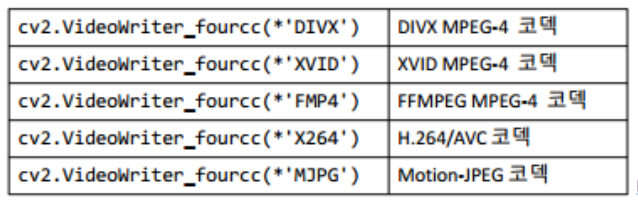
        - fps
            - FPS (Frame Per Second) - 초당 몇 프레임인지 지정
        - size
            - 저장할 frame 크기로 원본 동영상이나 웹캠의 width, height 순서로 넣는다.
    - `VideoWriter().write(img)`
        - Frame 저장

In [61]:
def test(*args):
    print(args)

test()    
test("a")
test("D", "I", "V", "X")
test("DIVX")
test(*"DIVX")

()
('a',)
('D', 'I', 'V', 'X')
('DIVX',)
('D', 'I', 'V', 'X')


In [64]:
## 웹캠입력 -> 저장
import cv2

cap = cv2.VideoCapture(0)
fps = cap.get(cv2.CAP_PROP_FPS)
# 한 frame을 캡쳐해서 size를 조회
_, img = cap.read()
h, w = img.shape[:2]
# print(img.shape) # height, width, channel
# print(fps)
# 코덱생성
codec = cv2.VideoWriter_fourcc(*"MJPG")

writer = cv2.VideoWriter("output/webcam_output.avi", codec, fps, (w, h))

while cap.isOpened():
    
    succ, img = cap.read()
    if not succ:
        print("읽기 실패")
        break
        
    img = cv2.flip(img, 1)
    writer.write(img)  #frame단위로 출력
    
    cv2.imshow("frame", img)
    if cv2.waitKey(1) == 27:
        break

cap.release()
writer.release()
cv2.destroyAllWindows()